In [1288]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

marketing = pd.read_csv('marketing.csv')


In [1289]:

#Inspect the data characteristics
#Print the first five rows of the DataFrame
print(marketing.head())
#Print the data information
print(marketing.info())
# Print the statistics of all columns
print(marketing.describe())




   Unnamed: 0     user_id date_served marketing_channel          variant  \
0           0  a100000029  2018-01-01         House Ads  personalization   
1           1  a100000030  2018-01-01         House Ads  personalization   
2           2  a100000031  2018-01-01         House Ads  personalization   
3           3  a100000032  2018-01-01         House Ads  personalization   
4           4  a100000033  2018-01-01         House Ads  personalization   

   converted language_displayed language_preferred    age_group  \
0       True            English            English   0-18 years   
1       True            English            English  19-24 years   
2       True            English            English  24-30 years   
3       True            English            English  30-36 years   
4       True            English            English  36-45 years   

  date_subscribed date_canceled subscribing_channel  is_retained  DoW  \
0      2018-01-01           NaN           House Ads         True  0

In [1290]:
# Check the data type of is_retained
print(marketing['is_retained'].dtype)

# Convert is_retained to a boolean
marketing['is_retained'] = marketing['is_retained'].astype('bool')

# Check the data type of is_retained, again
print(marketing['is_retained'].dtype)

bool
bool


In [1291]:
# Mapping for channels
channel_dict = {"House Ads": 1, "Instagram": 2, "Facebook": 3, "Email": 4, "Push": 5}

# Map the channel to a channel code
marketing['channel_code'] = marketing['subscribing_channel'].map(channel_dict)

In [1292]:
# Import numpy
import numpy as np

# Add the new column is_correct_lang
marketing['is_correct_lang'] = np.where(
    marketing['language_preferred'] == marketing['language_displayed'], 'Yes', 'No')

In [1293]:
# Import pandas into the environment
import pandas as pd

# Import marketing.csv with date columns
marketing = pd.read_csv('marketing.csv', 
parse_dates = ['date_served', 'date_subscribed', 'date_canceled'])

# Add a DoW column
marketing['DoW'] = marketing['date_subscribed'].dt.dayofweek

In [1294]:
# Group by date_served and count number of unique user_id's
daily_users = marketing.groupby(['date_served'])['user_id'].nunique()

# Print head of daily_users
print(daily_users.head())

date_served
2018-01-01    362
2018-01-02    374
2018-01-03    348
2018-01-04    323
2018-01-05    319
Name: user_id, dtype: int64


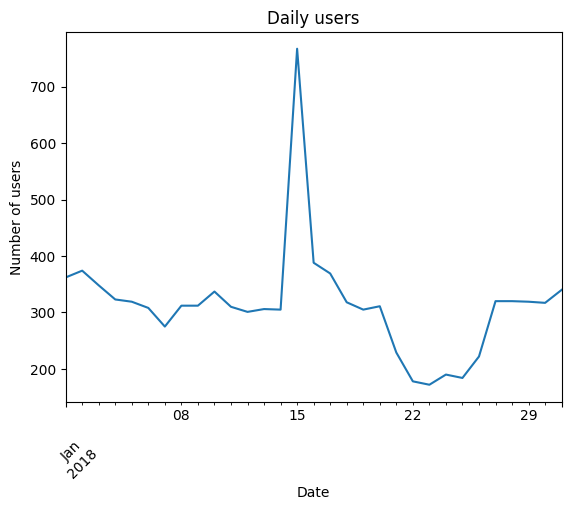

In [1295]:
# Plot daily_subscribers
daily_users.plot()

# Include a title and y-axis label
plt.title('Daily users')
plt.ylabel('Number of users')

# Rotate the x-axis labels by 45 degrees
plt.xlabel('Date')
plt.xticks(rotation =45)

# Display the plot
plt.show()

In [1296]:
#Measure the campaign's success using conversion rate
#Conversion rate = No of people who convert/ Total number of people we marketed to 
# Retention rate= No of people who remained subscribed/ Total number of people who converted
#Calculate the number of people who subscribed 
total_subscribers = marketing[marketing['converted'] == True]['user_id'].nunique()

#Calculate the number of people we marketed to
total= marketing['user_id'].nunique()

#Calculate the conversion rate
conversion_rate= total_subscribers/total
print(round(conversion_rate * 100, 2), "%")



14.09 %


In [1297]:
#Now calculate the retention rate
# Calculate the number of subscribers
total_subscribers = marketing[marketing["converted"]== True]['user_id'].nunique()

# Calculate the number of people who remained subscribed
retained = marketing[marketing['is_retained']== True]['user_id'].nunique()

# Calculate the retention rate
retention_rate = retained/total_subscribers
print(round(retention_rate*100, 2), "%")

676.41 %


In [1298]:
# Customer Segmentation by House Ads 
#Check retention rate for users who converted using only House Ads
house_ads = marketing[marketing['subscribing_channel'] == 'House Ads']
retained_hads = house_ads[house_ads['is_retained']== True]['user_id'].nunique()
subscribers= house_ads[house_ads['converted']== True]['user_id'].nunique()

retention_rate = retained_hads/ subscribers
print(round(retention_rate*100, 2), '%')

58.05 %


In [1299]:
#Customer Segmentation by Language(English)
# Isolate english speakers
english_speakers = marketing[marketing['language_displayed'] == 'English'] 

# Calculate the total number of English speaking users
total_eng = english_speakers['user_id'].nunique()

# Calculate the number of English speakers who converted
subscribers_eng = english_speakers[english_speakers['converted']== True].groupby(['language_displayed'])['user_id'].nunique()

# Calculate conversion rate
conversion_rate = subscribers_eng/total_eng
print('English speaker conversion rate:', round(conversion_rate*100,2), '%')

English speaker conversion rate: language_displayed
English    13.13
Name: user_id, dtype: float64 %


In [1300]:
#Grouping by subscribing_channel and calculate retention
retained_sc = marketing[marketing['is_retained']== True].groupby(['subscribing_channel'])['user_id'].nunique()
print(retained_sc)

subscribing_channel
Email        141
Facebook     152
House Ads    173
Instagram    158
Push          54
Name: user_id, dtype: int64


In [1301]:
# Group by subscribing_channel and calculate subscribers
subscribers_sc= marketing[marketing['converted']== True].groupby(['subscribing_channel'])['user_id'].nunique()
print(subscribers_sc)

subscribing_channel
Email        161
Facebook     221
House Ads    298
Instagram    232
Push          77
Name: user_id, dtype: int64


In [1302]:
#Calculate the retention rate across the DataFrame 
channel_retention_rate = (retained_sc/subscribers_sc)*100
print(channel_retention_rate)


subscribing_channel
Email        87.577640
Facebook     68.778281
House Ads    58.053691
Instagram    68.103448
Push         70.129870
Name: user_id, dtype: float64


In [1303]:

# Group by language_displayed and count unique users
total_lang = marketing.groupby(['language_displayed'])\
                    ['user_id'].nunique()

# Group by language_displayed and count unique conversions
subscribers_lang= marketing[marketing['converted'] == True]\
                            .groupby(['language_displayed'])\
                            ['user_id'].nunique()

# Calculate the conversion rate for all languages
language_conversion_rate = subscribers_lang/total_lang
print(language_conversion_rate)

language_displayed
Arabic     0.500000
English    0.131260
German     0.716216
Spanish    0.200000
Name: user_id, dtype: float64


In [1304]:
# Group by date_served and count unique users
total_users_by_date_served = marketing.groupby(['date_served'])['user_id'].nunique()
total_users_by_date_subscribed = marketing.groupby(['date_subscribed'])['user_id'].nunique()


# Group by date_subscribed and count unique converted users
subscribers_date= marketing[marketing['converted']== True].groupby(['date_served'])['user_id'].nunique()

# Group by date_served and count subscriber quality 
retained_by_date= marketing[marketing['is_retained']== True].groupby(['date_subscribed'])['user_id'].nunique()


# Calculate the conversion rate per day
daily_conversion_rate = subscribers_date/total_users_by_date
print(daily_conversion_rate)

#Calculate the subscriber quality across dates
daily_retention_rate = retained_by_date/total_users_by_date
print(daily_retention_rate)

date_served
2018-01-01    0.099448
2018-01-02    0.098930
2018-01-03    0.103448
2018-01-04    0.108359
2018-01-05    0.125392
2018-01-06    0.113636
2018-01-07    0.141818
2018-01-08    0.115385
2018-01-09    0.125000
2018-01-10    0.118694
2018-01-11    0.080645
2018-01-12    0.076412
2018-01-13    0.084967
2018-01-14    0.085246
2018-01-15    0.113429
2018-01-16    0.255155
2018-01-17    0.219512
2018-01-18    0.091195
2018-01-19    0.059016
2018-01-20    0.067524
2018-01-21    0.087336
2018-01-22    0.123596
2018-01-23    0.122093
2018-01-24    0.115789
2018-01-25    0.125000
2018-01-26    0.090090
2018-01-27    0.065625
2018-01-28    0.062500
2018-01-29    0.059561
2018-01-30    0.066246
2018-01-31    0.052941
Name: user_id, dtype: float64
date_subscribed
2018-01-01    0.077348
2018-01-02    0.069519
2018-01-03    0.077586
2018-01-04    0.055728
2018-01-05    0.072100
2018-01-06    0.090909
2018-01-07    0.072727
2018-01-08    0.073718
2018-01-09    0.086538
2018-01-10    0.083086

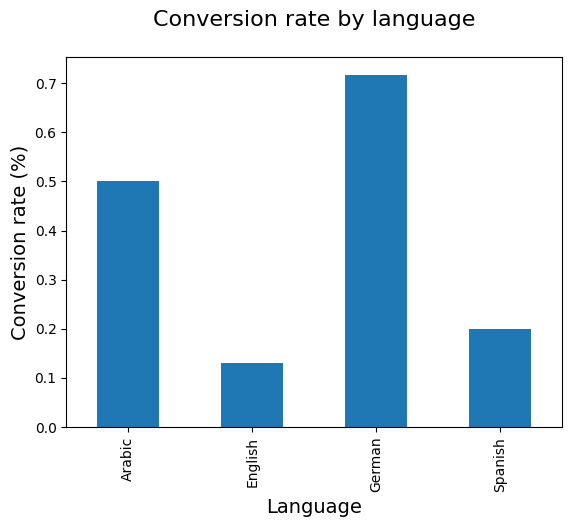

In [1305]:
# Create a bar chart using channel retention DataFrame
language_conversion_rate.plot(kind= 'bar')

#Add a title and x and y-axis labels
plt.title('Conversion rate by language\n', size=16)
plt.xlabel('Language', size = 14)
plt.ylabel('Conversion rate (%)', size = 14)

#Displaying the plot
plt.show()

In [1306]:
# Prepare data to plot the daily retention rate 
#Reset index to turn the Series into a DataFrame

daily_retention_rate= pd.DataFrame(daily_retention_rate.reset_index())

#Rename columns
daily_retention_rate.columns = ['date_subscribed', 'retention_rate']

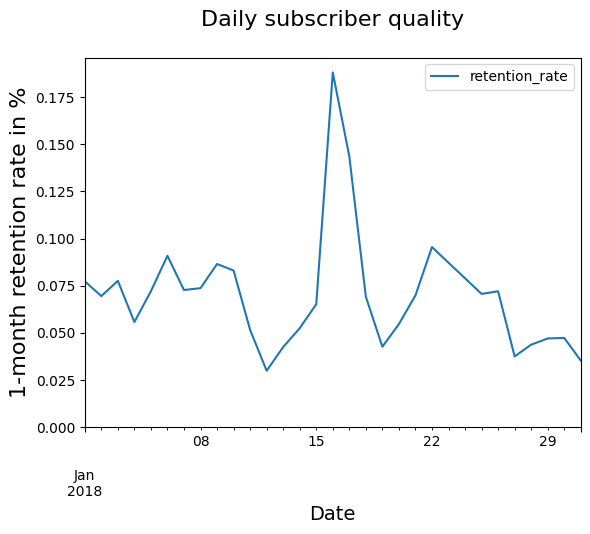

In [1307]:
#Visualizing the data trend over time
# Create a line chart using daily_retention DF

daily_retention_rate.plot('date_subscribed','retention_rate')

#Add a title and x and y-axis labels
plt.title('Daily subscriber quality\n', size = 16)
plt.ylabel('1-month retention rate in %', size = 16)
plt.xlabel('Date', size = 14)

#Ste the y-axos to begin at 0
plt.ylim(0)

#Displaying the plot
plt.show()

In [1308]:
# Prepare data to plot the daily conversion rate 
#Reset index to turn the Series into a DataFrame

daily_conversion_rate= pd.DataFrame(daily_conversion_rate.reset_index())

#Rename columns
daily_conversion_rate.columns = ['date_served', 'conversion_rate']

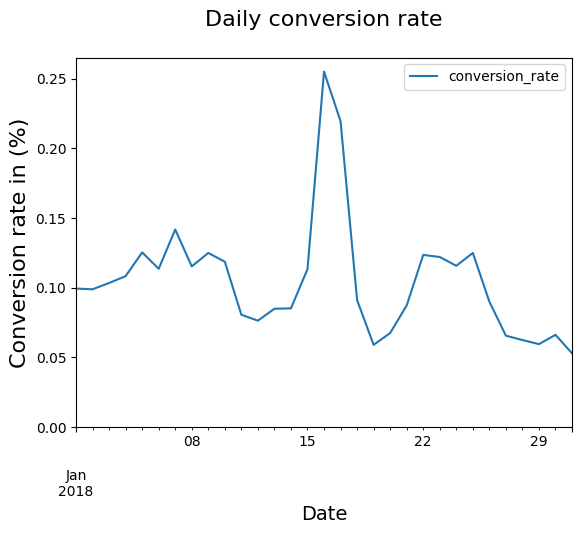

In [1309]:
#Visualizing the daily conversion rate 
# Create a line chart using daily_conversion rate DF

daily_conversion_rate.plot('date_served','conversion_rate')

#Add a title and x and y-axis labels
plt.title('Daily conversion rate\n', size = 16)
plt.ylabel('Conversion rate in (%)', size = 16)
plt.xlabel('Date', size = 14)

#Ste the y-axos to begin at 0
plt.ylim(0)

#Displaying the plot
plt.show()

In [1310]:
# Group the data by date, language preferred and count 

language = marketing.groupby(['date_served', 'language_preferred'])['user_id'].count()
language_df= pd.DataFrame(language.unstack(level=1))
print(language_df.head())

language_preferred  Arabic  English  German  Spanish
date_served                                         
2018-01-01             4.0    355.0     5.0     11.0
2018-01-02             4.0    397.0     6.0     10.0
2018-01-03             3.0    374.0     3.0      8.0
2018-01-04             2.0    318.0     2.0     14.0
2018-01-05             1.0    314.0     2.0     14.0


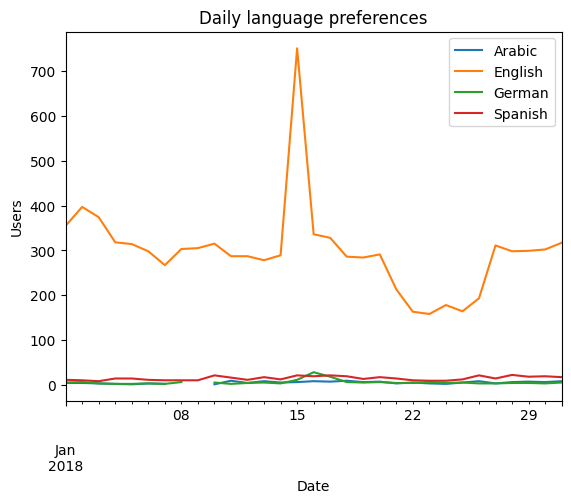

In [1311]:
language_df.plot()
plt.title('Daily language preferences')
plt.xlabel('Date')
plt.ylabel('Users')
plt.legend(loc ='upper right', labels = language_df.columns.values)

plt.show()

In [1312]:
# Grouping the data by Age and preferred language 
language_age= marketing.groupby(['language_preferred', 'age_group'])['user_id'].count()
language_age= pd.DataFrame(language_age.unstack(level= 1))
print(language_age.head())

age_group           0-18 years  19-24 years  24-30 years  30-36 years  \
language_preferred                                                      
Arabic                      19           26           19           19   
English                   1421         1560         1442         1251   
German                      31           29           35           16   
Spanish                     68           67           72           69   

age_group           36-45 years  45-55 years  55+ years  
language_preferred                                       
Arabic                       19           21         22  
English                    1260         1240       1101  
German                       19           25         12  
Spanish                      55           67         52  


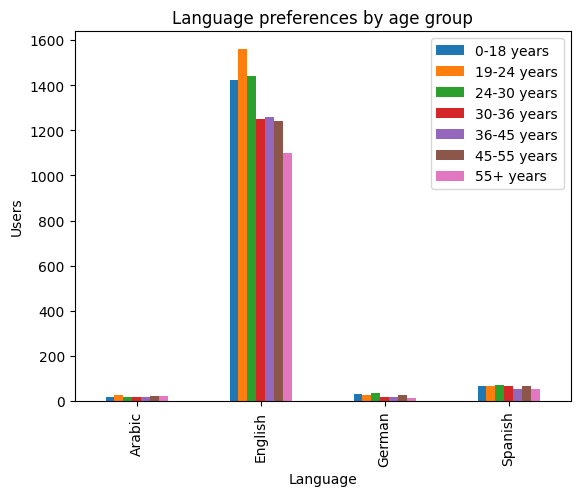

In [1313]:
#Plotting a bar chart for language preferences by age group
language_age.plot(kind= 'bar')
plt.title('Language preferences by age group')
plt.xlabel('Language')
plt.ylabel('Users')
plt.legend(loc= 'upper right', labels = language_age.columns.values)
plt.show()

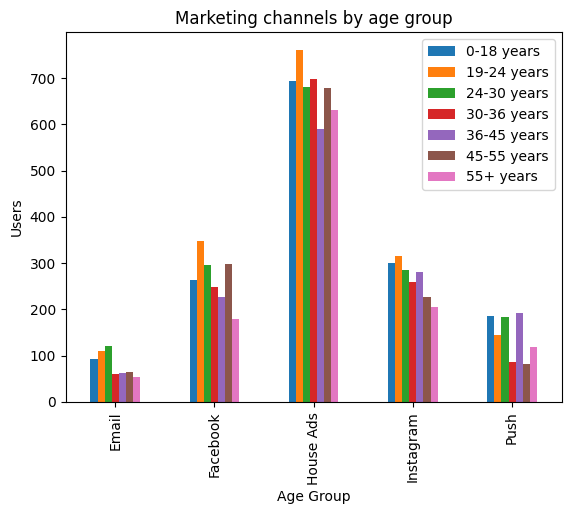

In [1314]:

#Grouping the data by Age and marketing channel 
channel_age = marketing.groupby(['marketing_channel', 'age_group'])['user_id'].count()

# Unstack channel_age and transform it into a DataFrame
channel_age_df= pd.DataFrame(channel_age.unstack(level=1))

# Plot channel_age
channel_age_df.plot(kind= 'bar')
plt.title('Marketing channels by age group')
plt.xlabel('Age Group')
plt.ylabel('Users')
# Add a legend to the plot
plt.legend(loc = 'upper right', labels = channel_age_df.columns.values)
plt.show()